In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import forward_selection

In [5]:
tc = pd.read_csv('ToyotaCorolla.csv')

In [6]:
tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [7]:
tc.shape

(1436, 39)

In [8]:
tc.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [9]:
tc.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [10]:
tc.drop(['Id', 'Model'], axis = 1, inplace = True)

In [11]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']

outcome = 'Price'

#partition data
X = pd.get_dummies(tc[predictors], drop_first = True)
y = tc[outcome]

train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size = 0.5, random_state = 1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size = 0.4, random_state = 1)

In [12]:
print('Training   : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test       : ', test_X.shape)

Training   :  (718, 16)
Validation :  (430, 16)
Test       :  (288, 16)


In [13]:
train_X.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
       'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [14]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj           AIC  Age_08_04  Airco  Automatic  Automatic_airco  CD_Player  Doors  \
0    1  0.767948  12822.658298       True  False      False            False      False  False   
1    2  0.822266  12632.183882       True  False      False             True      False  False   
2    3  0.843045  12543.911249       True  False      False             True      False  False   
3    4  0.854682  12489.591487       True  False      False             True      False  False   
4    5  0.873818  12389.203289       True  False      False             True      False  False   
5    6  0.878197  12364.831886       True  False      False             True      False  False   
6    7  0.880581  12351.628203       True  False      False             True      False  False   
7    8  0.883475  12335.003423       True  False      False             True      False  False   
8    9  0.885437  12323.800924       True  False      False             True      False   True   
9   10  0.886496  12

The four most important car specifications for predicting the car's price are Age_08_04, Automatic_airco, KM and HP 

In [15]:
regressionSummary(train_y, model.predict(train_X[variables]))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1235.9139
            Mean Absolute Error (MAE) : 914.8383
          Mean Percentage Error (MPE) : -0.9286
Mean Absolute Percentage Error (MAPE) : 8.9407


In [16]:
valid_X.shape

(430, 16)

In [17]:
valid_X.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
       'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [18]:
valid_X.dtypes

Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
Doors               int64
Quarterly_Tax       int64
Mfr_Guarantee       int64
Guarantee_Period    int64
Airco               int64
Automatic_airco     int64
CD_Player           int64
Powered_Windows     int64
Sport_Model         int64
Tow_Bar             int64
Fuel_Type_Diesel    uint8
Fuel_Type_Petrol    uint8
dtype: object

regressionSummary(valid_y, model.predict(valid_X[allVariables]))

In [21]:
#use forward selection to select predictors and check for accuracy
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=13870.51, constant
Step: score=12822.66, add Age_08_04
Step: score=12632.18, add Automatic_airco
Step: score=12543.91, add HP
Step: score=12499.68, add Quarterly_Tax
Step: score=12389.20, add KM
Step: score=12364.83, add Powered_Windows
Step: score=12351.63, add Sport_Model
Step: score=12335.00, add Guarantee_Period
Step: score=12323.80, add Doors
Step: score=12318.12, add Automatic
Step: score=12314.63, add Fuel_Type_Diesel
Step: score=12300.96, add Fuel_Type_Petrol
Step: score=12297.92, add Tow_Bar
Step: score=12295.12, add CD_Player
Step: score=12295.12, add None
['Age_08_04', 'Automatic_airco', 'HP', 'Quarterly_Tax', 'KM', 'Powered_Windows', 'Sport_Model', 'Guarantee_Period', 'Doors', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Tow_Bar', 'CD_Player']


In [25]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -72.0356
       Root Mean Squared Error (RMSE) : 1142.9966
            Mean Absolute Error (MAE) : 918.8287
          Mean Percentage Error (MPE) : -1.4997
Mean Absolute Percentage Error (MAPE) : 9.4911


With exhaustive selection, the model does better on the validation set than the forward_selection model.

0.7743055555555556


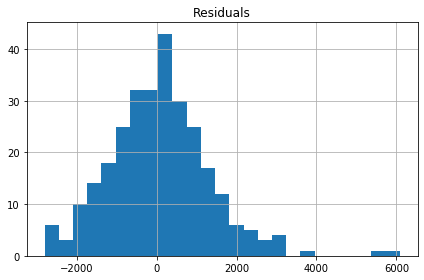

In [31]:
test_pred = model.predict(test_X)
all_residuals = test_y - test_pred
# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()